In [35]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from graphviz import Source
import xgboost as xgb
from xgboost import plot_tree
import seaborn as sns

In [37]:
labels = pd.read_csv('data/archive/actual.csv')
Train_Data = pd.read_csv('data/archive/data_set_ALL_AML_train.csv')
Test_Data = pd.read_csv('data/archive/data_set_ALL_AML_independent.csv')
labels.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [38]:
#check for nulls
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [39]:
#drop 'call' columns
cols = [col for col in Test_Data.columns if 'call' in col]
test = Test_Data.drop(cols, 1)
cols = [col for col in Train_Data.columns if 'call' in col]
train = Train_Data.drop(cols, 1)

In [40]:
#Join all the data
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [41]:
df_all = df_all.T

In [42]:
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)
# add the cancer column to train data

Data = pd.merge(df_all, labels, on="patient")

In [43]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [44]:
Data

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,13,1075,-45,524,249,40,-68,-1,68,0
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,-34,738,11,742,234,72,109,-30,69,0
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,35,241,-66,320,174,-4,176,40,70,0
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,-38,201,-55,348,208,0,74,-12,71,0


In [45]:
Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

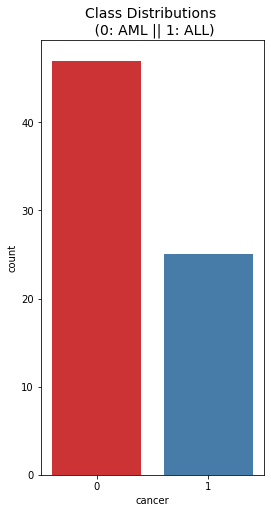

In [46]:
plt.figure(figsize=(4,8))
colors = ["AML", "ALL"]
sns.countplot('cancer', data=Data, palette = "Set1")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)

In [47]:
#X -> matrix of independent variable
#y -> vector of dependent variable
X, y = Data.drop(columns=["cancer"]), Data["cancer"]

In [48]:
X

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,68
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,69
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,70
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,71


In [49]:
y

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: cancer, Length: 72, dtype: uint8

In [50]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [51]:
#feature scaling
#from sklearn.preprocessing import StandardScaler, normalize
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [52]:
X_train.shape

(54, 7130)

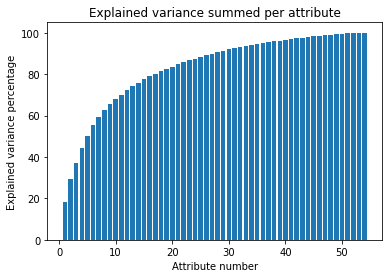

Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.
There are 27 attributes that together explain 90% of the variance.


In [53]:
pca = PCA()

X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#print(print(pca.explained_variance_ratio_))
pca_variance_ratio = pca.explained_variance_ratio_.cumsum()
pca_variance_percentage = pca_variance_ratio*100

#Calculate and plot explained variance PCA
pca_variance_ratio = pca.explained_variance_ratio_.cumsum()
pca_variance_percentage = pca_variance_ratio * 100
plt.bar(range(1,pca_variance_percentage.size+1), pca_variance_percentage)
plt.title("Explained variance summed per attribute")
plt.xlabel("Attribute number")
plt.ylabel("Explained variance percentage")
plt.show()
print('''Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.''')

#Determine number of attributes needed for an explained variance of 90%
pca_variance_cropped = [i for i in pca_variance_percentage if i <= 90]
no_attributes = len(pca_variance_cropped)
print("There are {} attributes that together explain 90% of the variance." .format(no_attributes))

In [54]:
pca.n_components_ 

54

SyntaxError: invalid syntax (<ipython-input-24-37af52720726>, line 3)